In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# plt.style.use('dark_background')
pd.pandas.set_option('display.max_columns',None)

In [2]:
#Reading the file
df = pd.read_csv('D:/Python_Learning/Personal projects/master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.shape

(27820, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2001.26,8.47,1985.00,1995.00,2002.00,2008.00,2016.00
suicides_no,27820.0,242.57,902.05,0.00,3.00,25.00,131.00,22338.00
population,27820.0,1844793.62,3911779.44,278.00,97498.50,430150.00,1486143.25,43805214.00
suicides/100k pop,27820.0,12.82,18.96,0.00,0.92,5.99,16.62,224.97
HDI for year,8364.0,0.78,0.09,0.48,0.71,0.78,0.86,0.94
gdp_per_capita ($),27820.0,16866.46,18887.58,251.00,3447.00,9372.00,24874.00,126352.00


In [7]:
round(df.describe(include='all').T,2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Mauritius,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820,NaN,NaN,NaN,2001.26,8.46906,1985,1995,2002,2008,2016
sex,27820,2,female,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,75+ years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,27820,NaN,NaN,NaN,242.574,902.048,0,3,25,131,22338
population,27820,NaN,NaN,NaN,1.84479e+06,3.91178e+06,278,97498.5,430150,1.48614e+06,4.38052e+07
suicides/100k pop,27820,NaN,NaN,NaN,12.8161,18.9615,0,0.92,5.99,16.62,224.97
country-year,27820,2321,Aruba2003,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HDI for year,8364,NaN,NaN,NaN,0.776601,0.0933667,0.483,0.713,0.779,0.855,0.944
gdp_for_year ($),27820,2321,"26,878,499,206",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['country-year'].str.replace('([A-Za-z]+)','').head()

0    1987
1    1987
2    1987
3    1987
4    1987
Name: country-year, dtype: object

In [9]:
df['country-year'].str.extract('([A-Za-z]+)').head()

,0
0,Albania
1,Albania
2,Albania
3,Albania
4,Albania


In [10]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [11]:
df.drop(['country-year','HDI for year'],inplace=True,axis=1)

In [12]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [13]:
df.isnull().sum().any()

False

In [14]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',','').astype(np.int64)

In [15]:
df.rename(columns={' gdp_for_year ($) ': 'GDP_for_year','gdp_per_capita ($)':'gdp_per_capita'},inplace=True)

In [16]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,GDP_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [17]:
df['Population_in_Million'] = df['population']/1000000

In [18]:
df['GDP_in_Billion'] = df['GDP_for_year']/1000000000

In [19]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,GDP_for_year,gdp_per_capita,generation,Population_in_Million,GDP_in_Billion
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,0.3129,2.156625
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent,0.3080,2.156625
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X,0.2897,2.156625
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation,0.0218,2.156625
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers,0.2743,2.156625


In [109]:
df_num = df.select_dtypes(['int64','float64'])

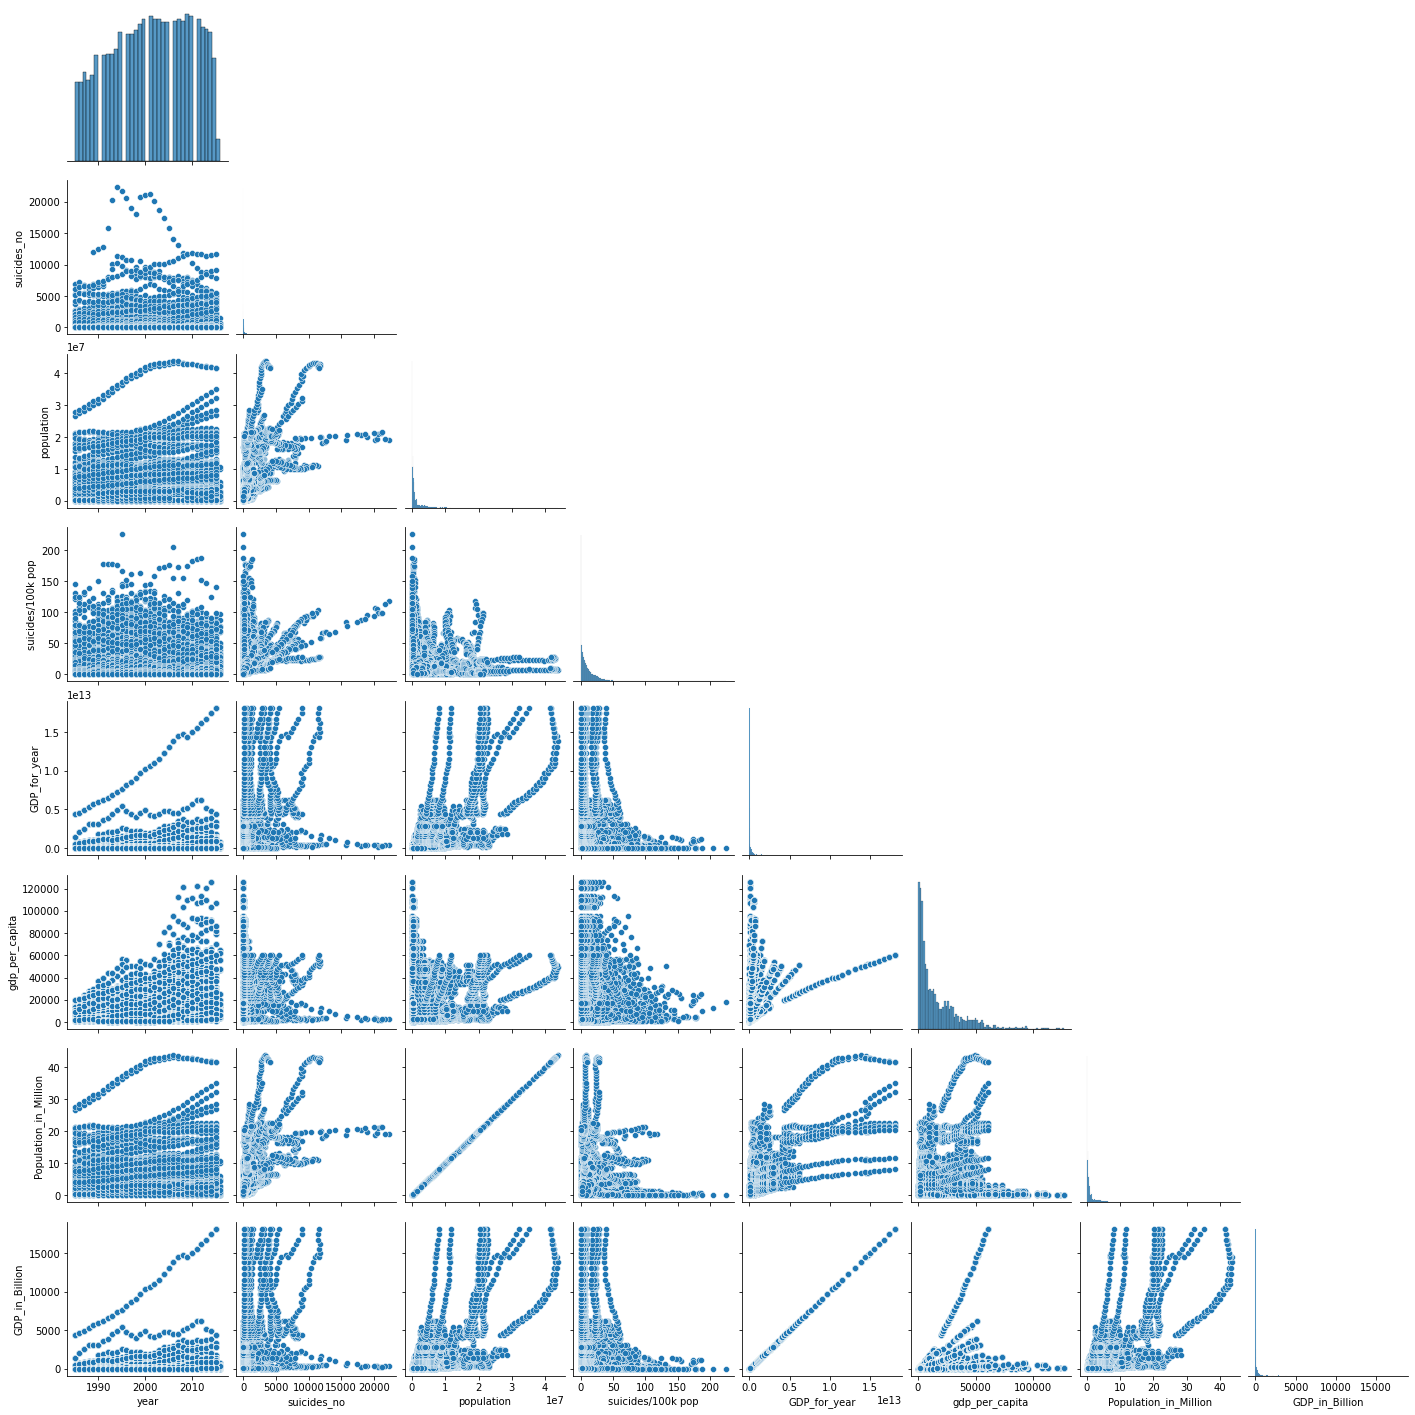

In [79]:
sns.pairplot(df,
             corner = True);

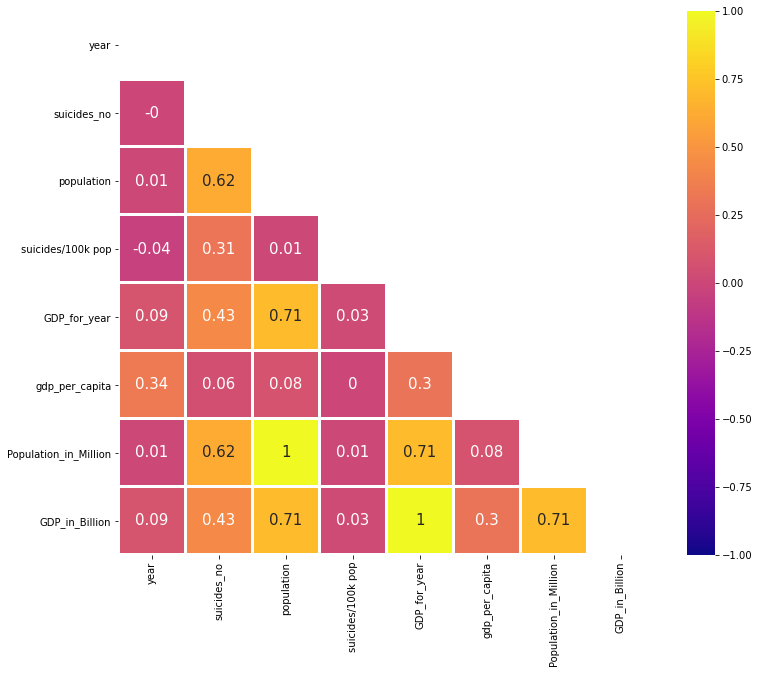

In [82]:
plt.figure(figsize=(12,10))
sns.heatmap(df_num.corr().round(2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='plasma',
            annot_kws={'size':15},
            linewidths=2,
            linecolor='white',
            mask=np.triu(np.ones_like(df_num.corr(),dtype='bool'))          
           );

In [137]:
#To find out variables showing highest correlation and the value of correlation
mydata_corr1 = df_num.corr().abs()
mydata_unstack = mydata_corr1[(mydata_corr1 != 1) & ((mydata_corr1 >=0.65)| (mydata_corr1 <=-5))].unstack().dropna().drop_duplicates()
mydata_highestcorr = mydata_unstack.sort_values(ascending = False)
mydata_highestcorr

population             Population_in_Million    1.000000
GDP_for_year           GDP_in_Billion           1.000000
Population_in_Million  GDP_in_Billion           0.710697
population             GDP_in_Billion           0.710697
                       GDP_for_year             0.710697
GDP_for_year           Population_in_Million    0.710697
dtype: float64

### Country V/S Suicides

In [20]:
df_country_suicides = df.groupby('country')['suicides_no'].mean().reset_index()

In [21]:
df_country_suicides.sort_values('suicides_no').head(10)['country']

76           Saint Kitts and Nevis
27                        Dominica
1              Antigua and Barbuda
79                      San Marino
37                         Grenada
55                        Maldives
8                          Bahamas
48                        Kiribati
78    Saint Vincent and Grenadines
81                      Seychelles
Name: country, dtype: object

In [22]:
df_country_suicides.sort_values('suicides_no').head(10)['suicides_no']

76    0.000000
27    0.000000
1     0.033951
79    0.111111
37    0.122581
55    0.166667
8     0.336957
48    0.401515
78    0.413333
81    0.453704
Name: suicides_no, dtype: float64

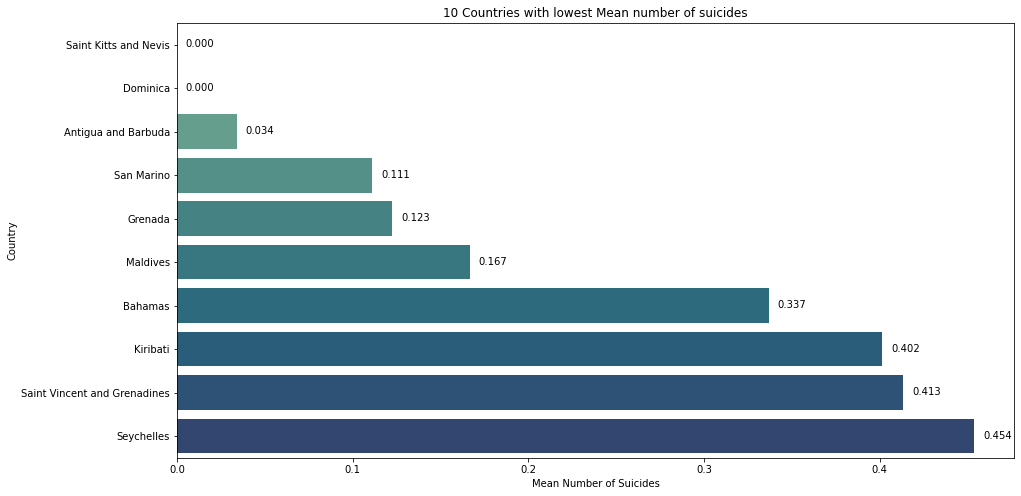

In [23]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y=df_country_suicides.sort_values('suicides_no').head(10)['country'].values,x=df_country_suicides.sort_values('suicides_no').head(10)['suicides_no'].values,palette='crest');
ax.set(xlabel="Mean Number of Suicides", ylabel = "Country", title = "10 Countries with lowest Mean number of suicides");
for bar in ax.patches:
    ax.annotate(text='{:.3f}'.format(bar.get_width()), xy=(bar.get_width()+0.005, bar.get_y()+0.45))

In [24]:
df_country_suicides.sort_values('suicides_no',ascending=False).head()

,country,suicides_no
75,Russian Federation,3733.771605
98,United States,2779.604839
46,Japan,2169.091398
95,Ukraine,952.232143
35,Germany,933.532051


In [25]:
df_country_suicides.sort_values('suicides_no',ascending=False).head()['country']

75    Russian Federation
98         United States
46                 Japan
95               Ukraine
35               Germany
Name: country, dtype: object

In [26]:
df_country_suicides.sort_values('suicides_no',ascending=False).head()['suicides_no']

75    3733.771605
98    2779.604839
46    2169.091398
95     952.232143
35     933.532051
Name: suicides_no, dtype: float64

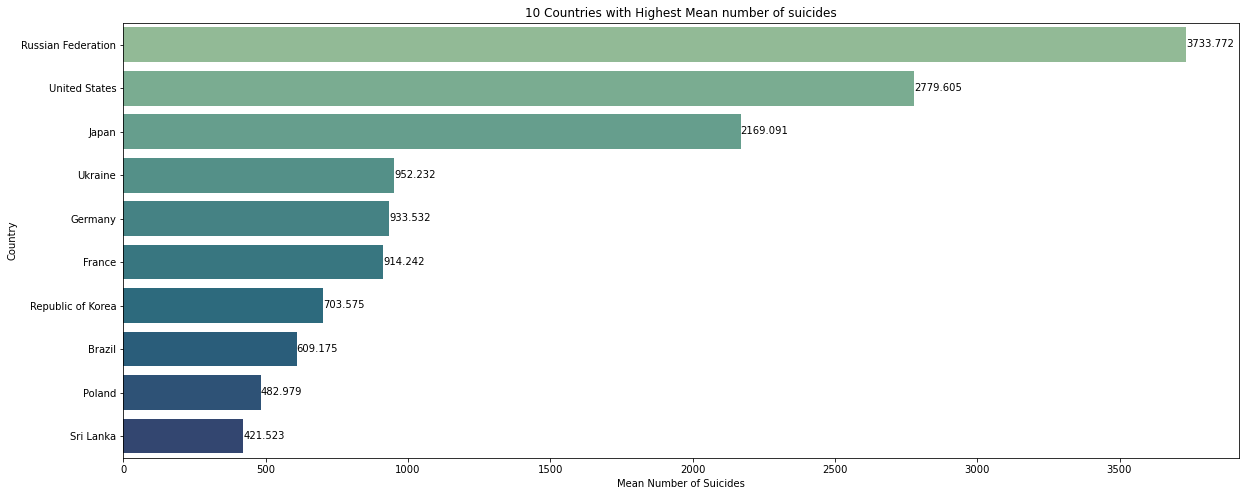

In [27]:
plt.figure(figsize=(20,8))
ax = sns.barplot(y=df_country_suicides.sort_values('suicides_no',ascending=False).head(10)['country'].values,x=df_country_suicides.sort_values('suicides_no',ascending=False).head(10)['suicides_no'].values,palette='crest');
ax.set(xlabel="Mean Number of Suicides", ylabel = "Country", title = "10 Countries with Highest Mean number of suicides");
for bar in ax.patches:
    ax.annotate(text='{:.3f}'.format(bar.get_width()), xy=(bar.get_width()+0.005, bar.get_y()+0.45))

In [28]:
df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop').head(10)

,country,suicides/100k pop
76,Saint Kitts and Nevis,0.000000
27,Dominica,0.000000
45,Jamaica,0.521765
1,Antigua and Barbuda,0.552901
65,Oman,0.736111
85,South Africa,0.964542
49,Kuwait,1.186433
8,Bahamas,1.247391
96,United Arab Emirates,1.317917
55,Maldives,1.367333


In [29]:
df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop',ascending=False).head(10)

,country,suicides/100k pop
52,Lithuania,40.415573
87,Sri Lanka,35.295152
75,Russian Federation,34.892377
40,Hungary,32.761516
11,Belarus,31.075913
47,Kazakhstan,30.511282
51,Latvia,29.259325
84,Slovenia,27.827857
30,Estonia,27.276905
95,Ukraine,26.582321


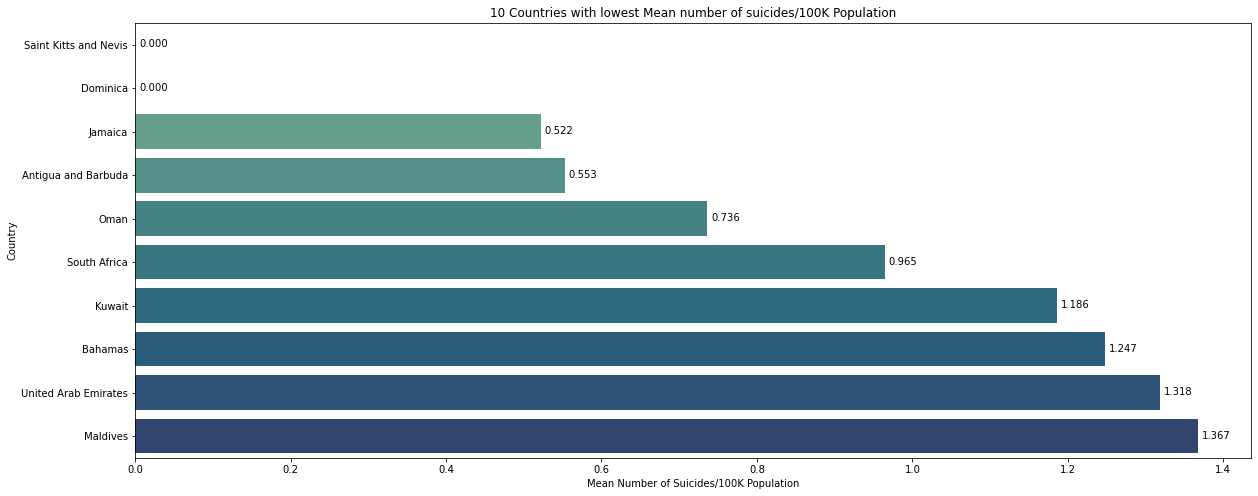

In [30]:
plt.figure(figsize=(20,8))
ax = sns.barplot(
    y=df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop').head(10)['country'].values,
    x=df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop').head(10)['suicides/100k pop'].values,
    palette='crest');
ax.set(xlabel="Mean Number of Suicides/100K Population", ylabel = "Country", title = "10 Countries with lowest Mean number of suicides/100K Population");
for bar in ax.patches:
    ax.annotate(text='{:.3f}'.format(bar.get_width()), xy=(bar.get_width()+0.005, bar.get_y()+0.45))

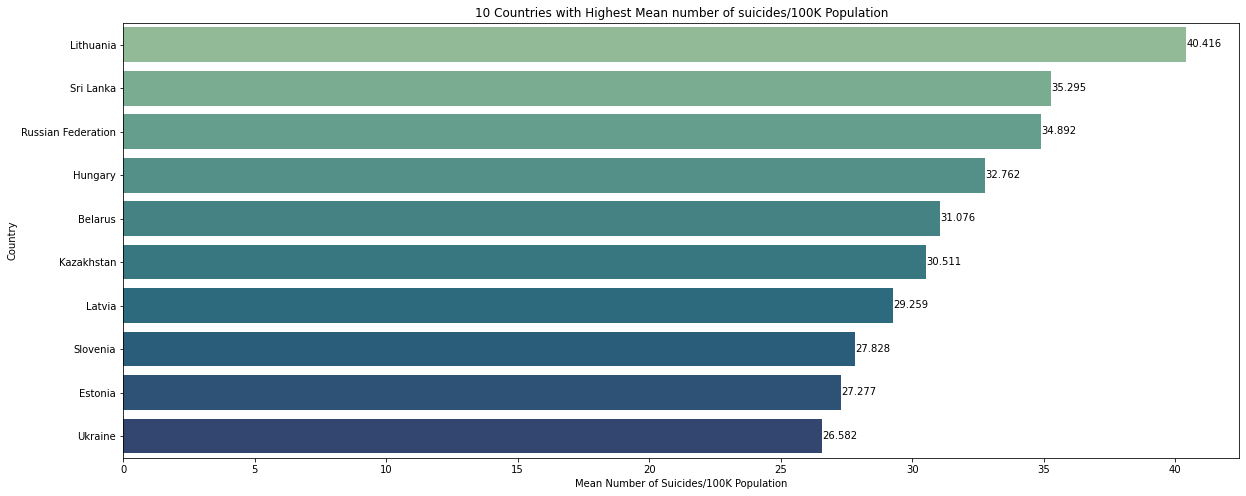

In [31]:
plt.figure(figsize=(20,8))
ax = sns.barplot(
    y=df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop',ascending=False).head(10)['country'].values,
    x=df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop',ascending=False).head(10)['suicides/100k pop'].values,
    palette='crest');
ax.set(xlabel="Mean Number of Suicides/100K Population", ylabel = "Country", title = "10 Countries with Highest Mean number of suicides/100K Population");
for bar in ax.patches:
    ax.annotate(text='{:.3f}'.format(bar.get_width()), xy=(bar.get_width()+0.01, bar.get_y()+0.45))

### GDP V/S Suicides

In [32]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'GDP_for_year', 'gdp_per_capita', 'generation',
       'Population_in_Million', 'GDP_in_Billion'],
      dtype='object')

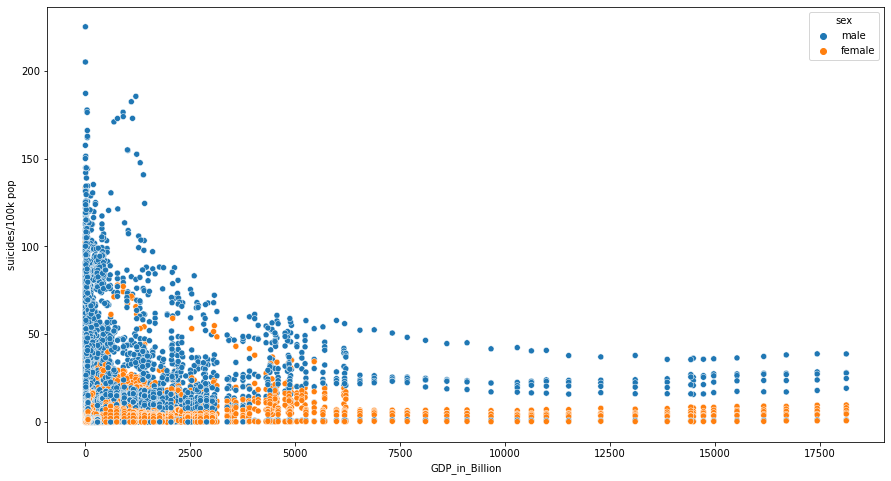

In [33]:
plt.figure(figsize=(15,8))
# plt.axis('tight')
# scale_factor = 100
# xmin, xmax = plt.xlim()
# # ymin, ymax = plt.ylim()
# plt.xlim(xmin * scale_factor, xmax * scale_factor)
# plt.ylim(ymin * scale_factor, ymax * scale_factor)
sns.scatterplot(x='GDP_in_Billion',y='suicides/100k pop',hue='sex',data=df,);

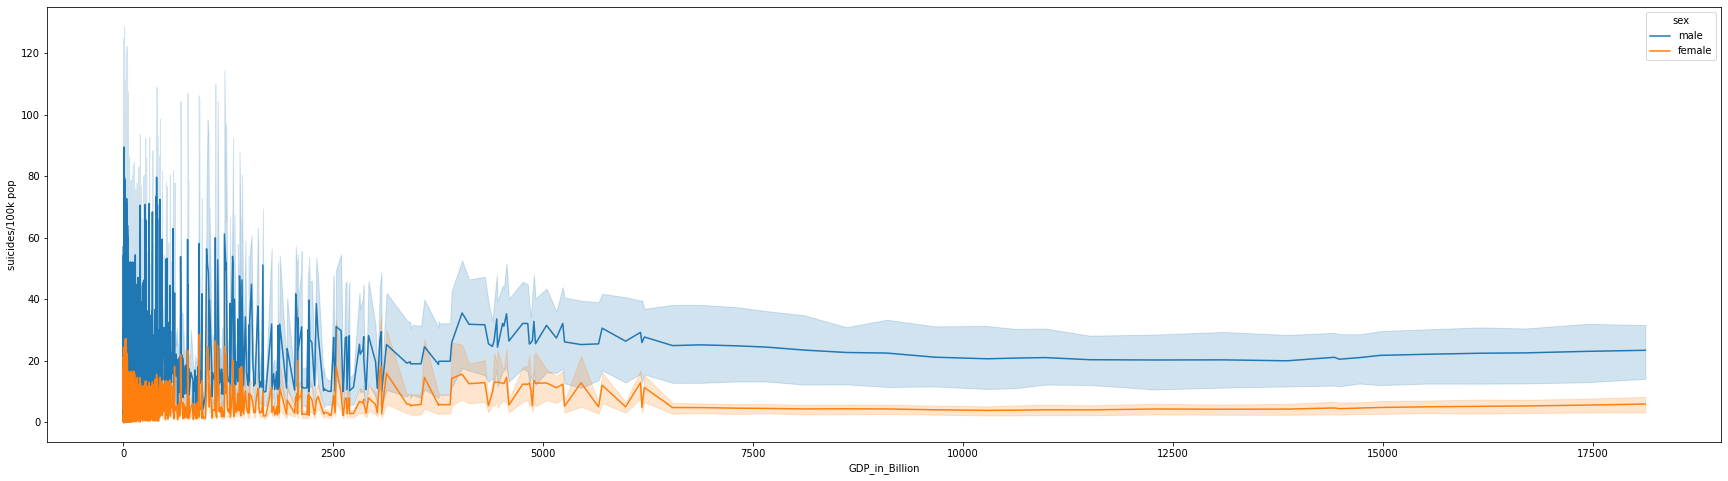

In [34]:
plt.figure(figsize=(30,8))
sns.lineplot(x='GDP_in_Billion',y='suicides/100k pop',hue='sex',data=df,);

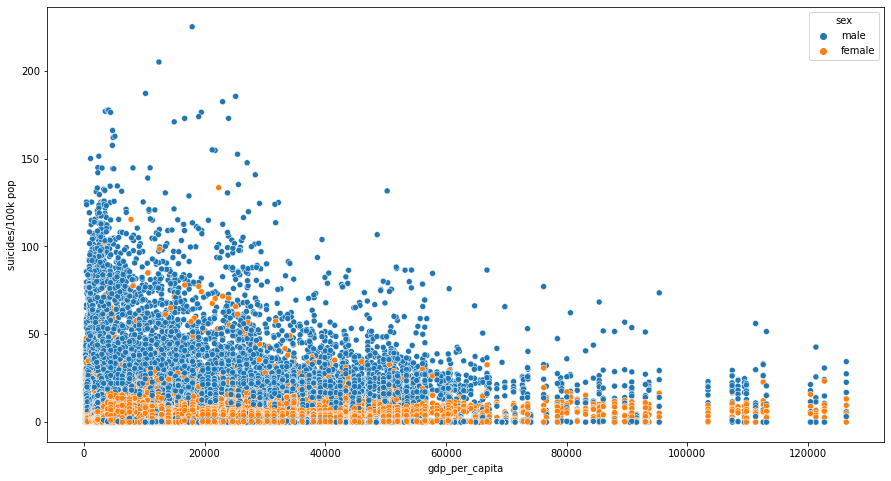

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='gdp_per_capita',y='suicides/100k pop',hue='sex',data=df,);

### Population V/S Suicides

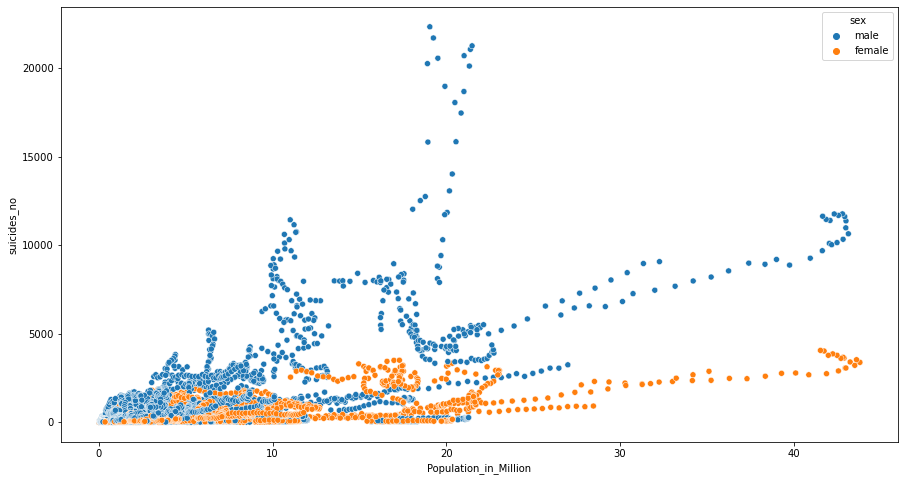

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Population_in_Million',y='suicides_no',hue='sex',data=df,);

### Year V/S Suicides

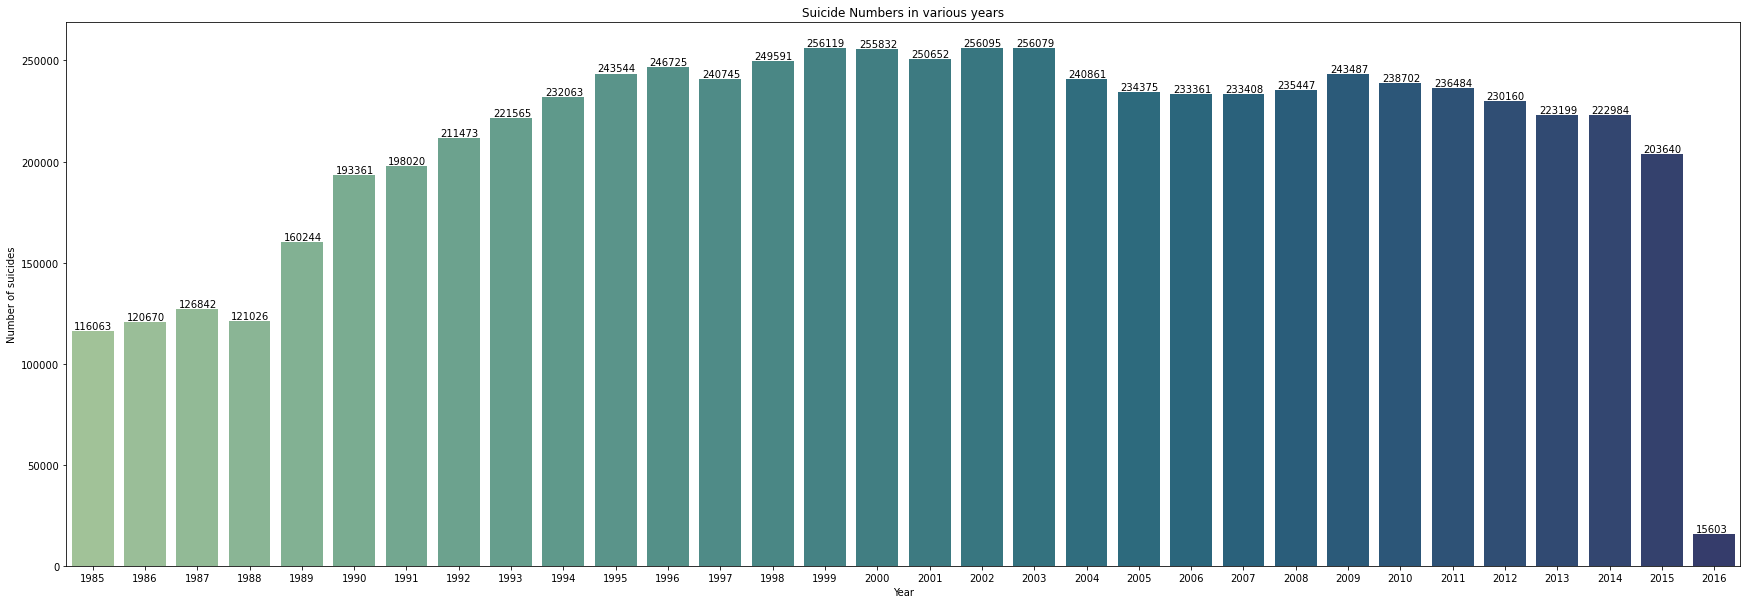

In [38]:
# plt.yticks(list(df.groupby('year')['suicides/100k pop'].mean().reset_index()['year']))
plt.figure(figsize=(30,10))

ax = sns.barplot(x=df.groupby('year')['suicides_no'].sum().reset_index()['year']
           ,y=df.groupby('year')['suicides_no'].sum().reset_index()['suicides_no']
               , palette='crest');

ax.set(xlabel="Year", 
       ylabel = "Number of suicides", 
       title = "Suicide Numbers in various years");

for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_height()), xy=(bar.get_x()+0.05, bar.get_height()+1000))

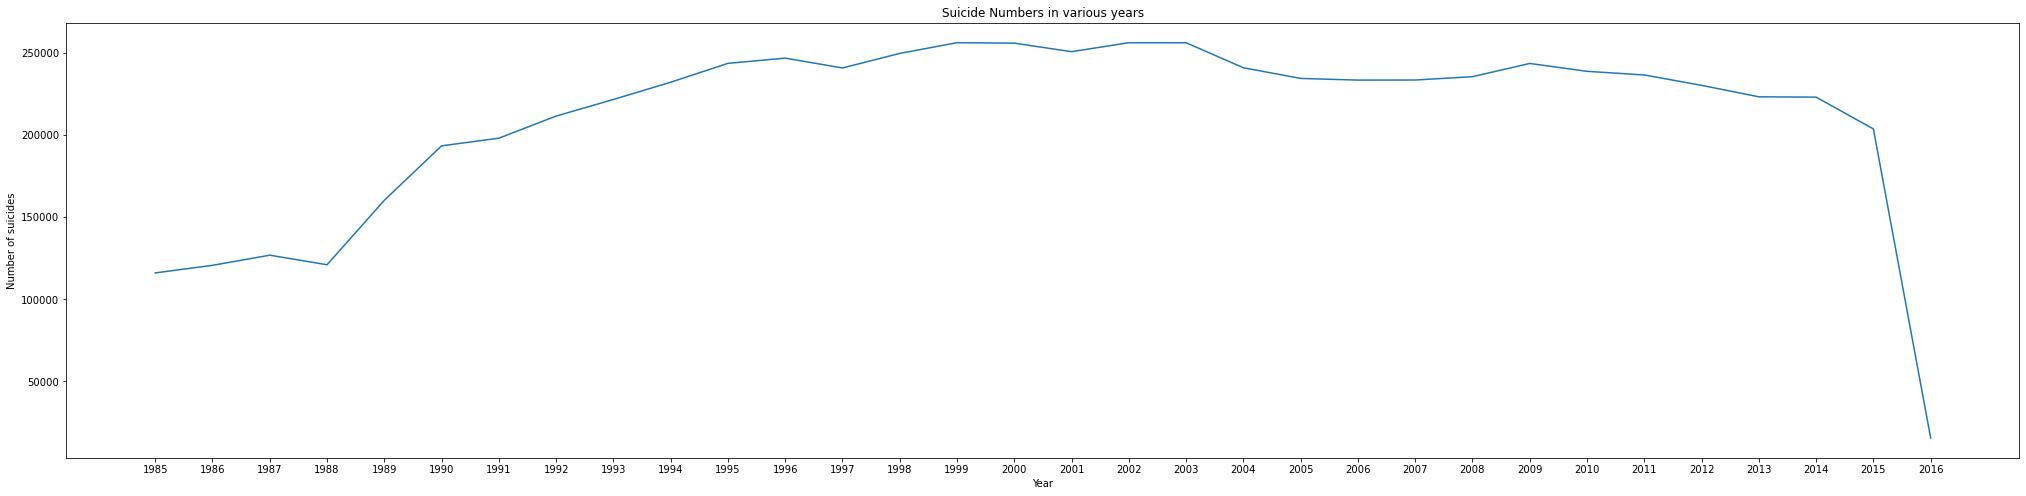

In [112]:
plt.figure(figsize=(35,8))
plt.xlabel('Year')
plt.ylabel('Number of suicides')
plt.title('Suicide Numbers in various years')
plt.xticks(list(df.groupby('year')['suicides_no'].sum().index))
sns.lineplot(x=df.groupby('year')['suicides_no'].sum().index,
             y=df.groupby('year')['suicides_no'].sum().values,
             ci=None);

### Age V/S Suicides

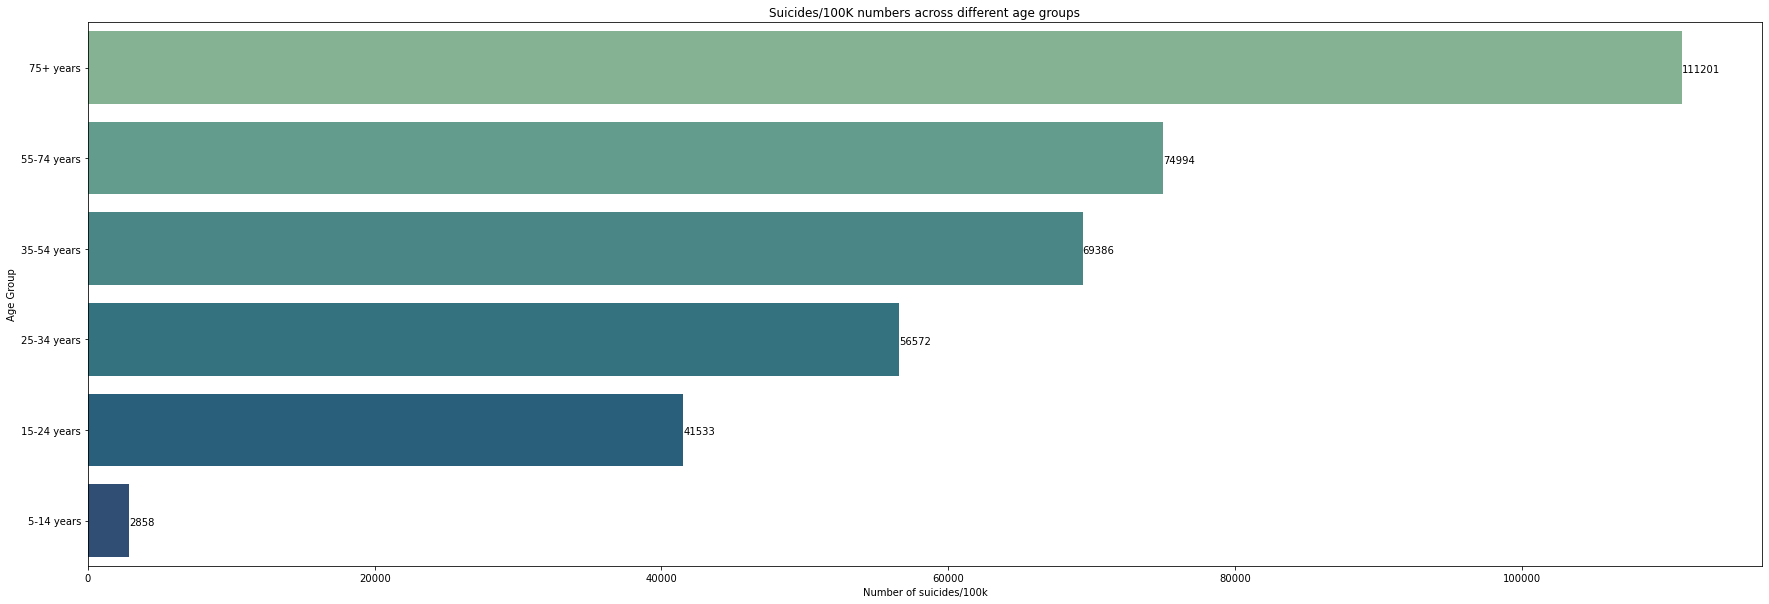

In [103]:
plt.figure(figsize=(30,10))

ax1 = sns.barplot(
    y= 'age',
    x= 'suicides/100k pop',
    data = df.groupby('age')['suicides/100k pop'].sum().reset_index().sort_values('suicides/100k pop',ascending=False),
    ci=None,
    estimator = sum,
    palette='crest');

ax1.set(ylabel="Age Group", xlabel = "Number of suicides/100k", title = "Suicides/100K numbers across different age groups");

for bar in ax1.patches:
    ax1.annotate(text='{:.0f}'.format(bar.get_width()), xy=(bar.get_width()+0.5, bar.get_y()+0.45))

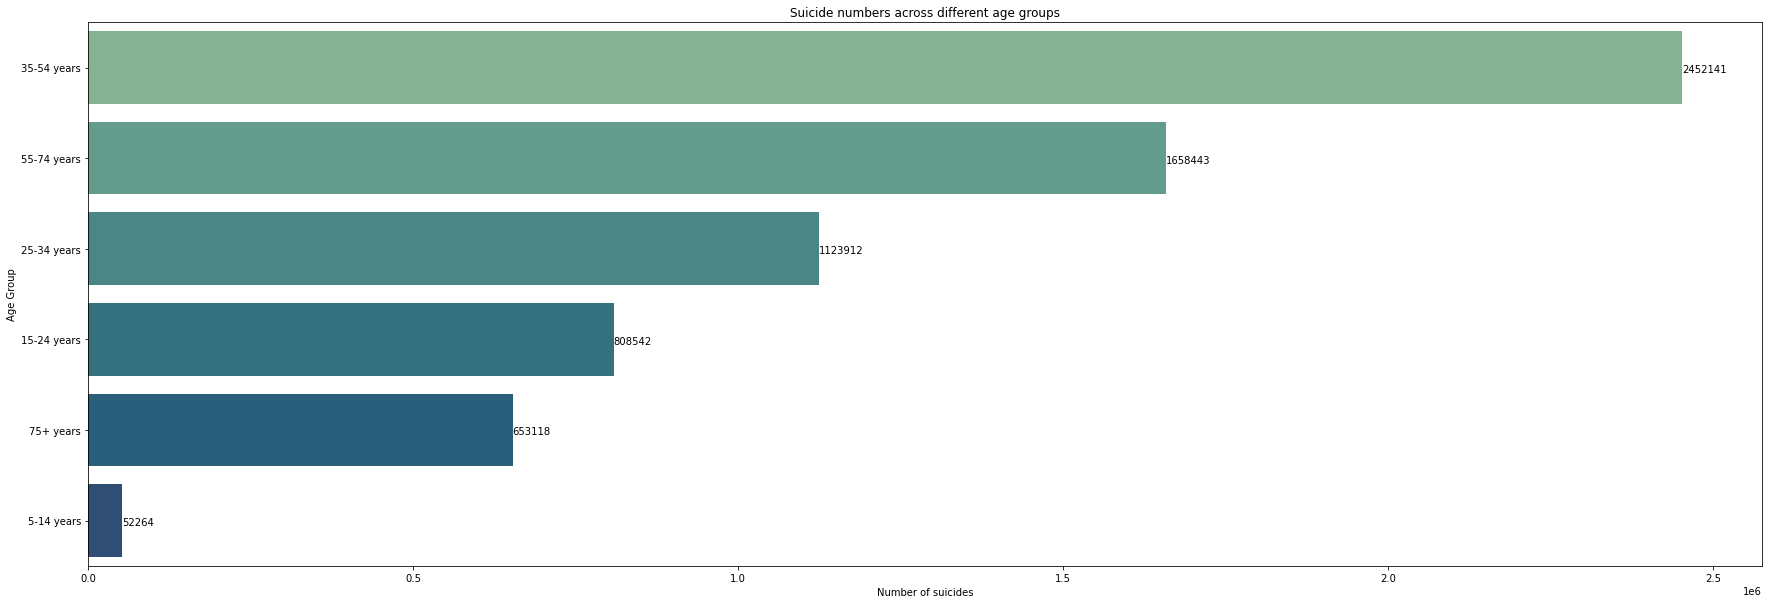

In [55]:
plt.figure(figsize=(30,10))

ax = sns.barplot(
    y= 'age',
    x= 'suicides_no',
    data = df.sort_values('suicides_no',ascending = False),
    ci=None,
    estimator = sum,
    palette='crest');

ax.set(ylabel="Age Group", xlabel = "Number of suicides", title = "Suicide numbers across different age groups");

for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_width()), xy=(bar.get_width()+0.01, bar.get_y()+0.45))

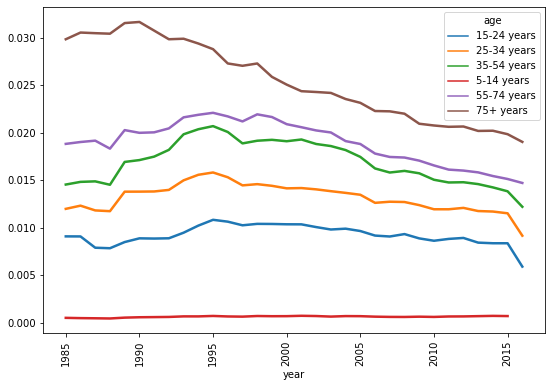

In [134]:
df_age = df.groupby(['year','age'])['suicides_no', 'population'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_age['suicides_no']*100/df_age['population'], hue = "age",
             data = df_age, linewidth = 2.5, style = "age"
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

### Sex V/S Suicides

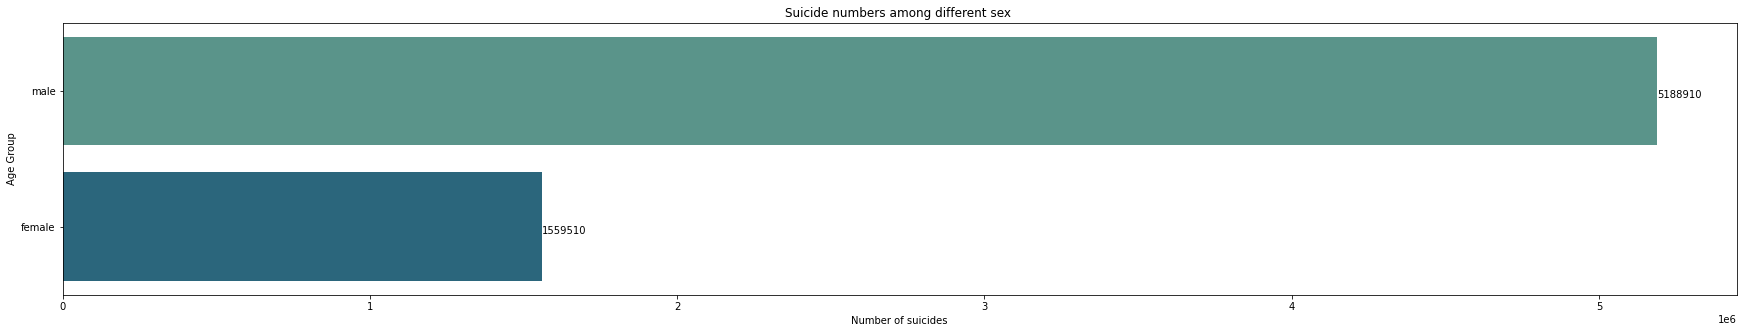

In [58]:
plt.figure(figsize=(30,5))

ax = sns.barplot(
    y= 'sex',
    x= 'suicides_no',
    data = df.sort_values('suicides_no',ascending = False),
    ci=None,
    estimator = sum,
    palette='crest');

ax.set(ylabel="Age Group", xlabel = "Number of suicides", title = "Suicide numbers among different sex ");

for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_width()), xy=(bar.get_width()+0.01, bar.get_y()+0.45))

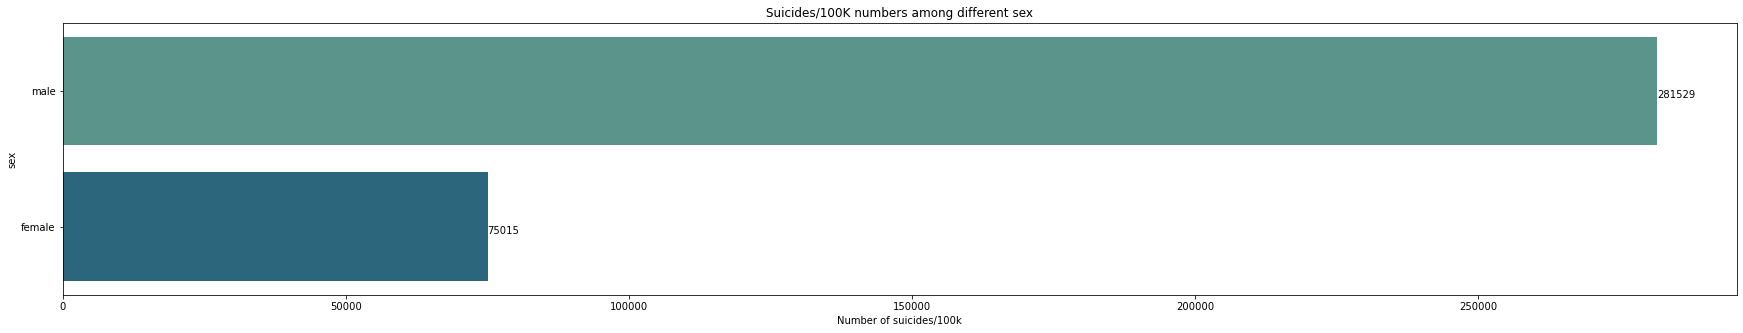

In [105]:
plt.figure(figsize=(30,5))

ax = sns.barplot(
    y= 'sex',
    x= 'suicides/100k pop',
    data = df.groupby('sex')['suicides/100k pop'].sum().reset_index().sort_values('suicides/100k pop',ascending=False),
    ci=None,
    estimator = sum,
    palette='crest');

ax.set(ylabel="sex", xlabel = "Number of suicides/100k", title = "Suicides/100K numbers among different sex");

for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_width()), xy=(bar.get_width()+0.5, bar.get_y()+0.45))

### Generation V/S Suicides

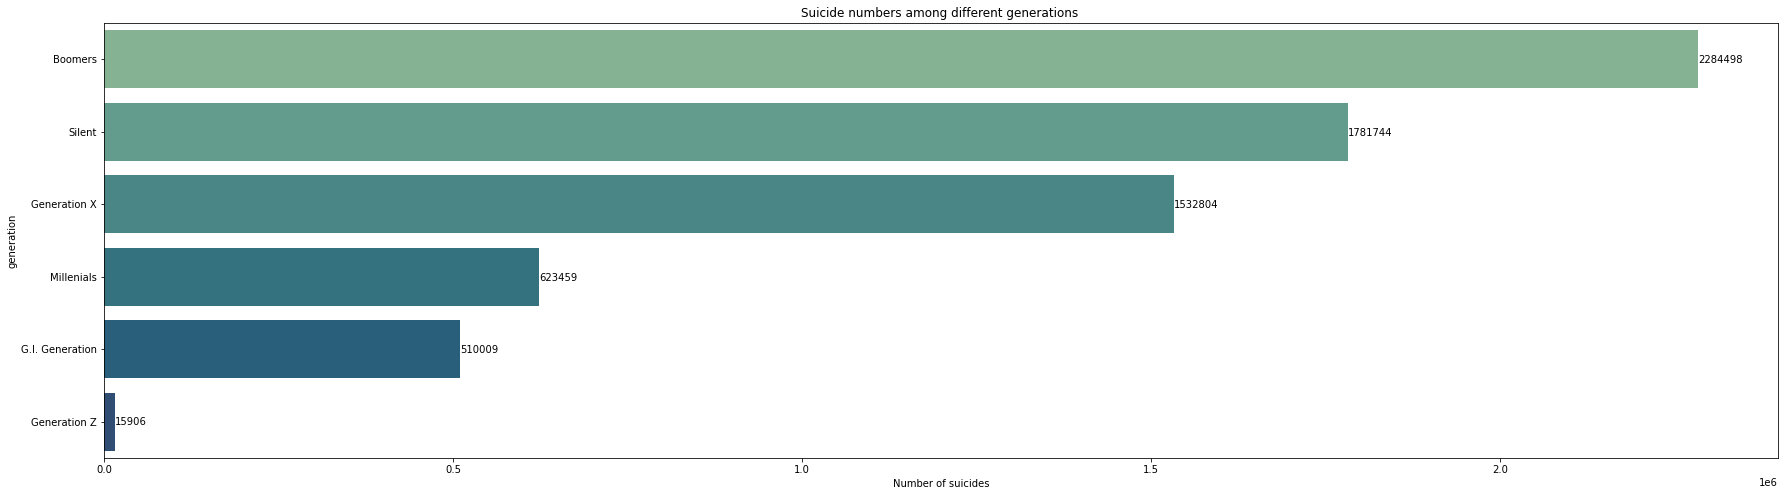

In [75]:
plt.figure(figsize=(30,8))

ax = sns.barplot(
    y= 'generation',
    x= 'suicides_no',
    data = df.sort_values('suicides_no',ascending = False),
    ci=None,
    estimator = sum,
    palette='crest');

ax.set(ylabel="generation", xlabel = "Number of suicides", title = "Suicide numbers among different generations ");

for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_width()), xy=(bar.get_width()+0.01, bar.get_y()+0.45))

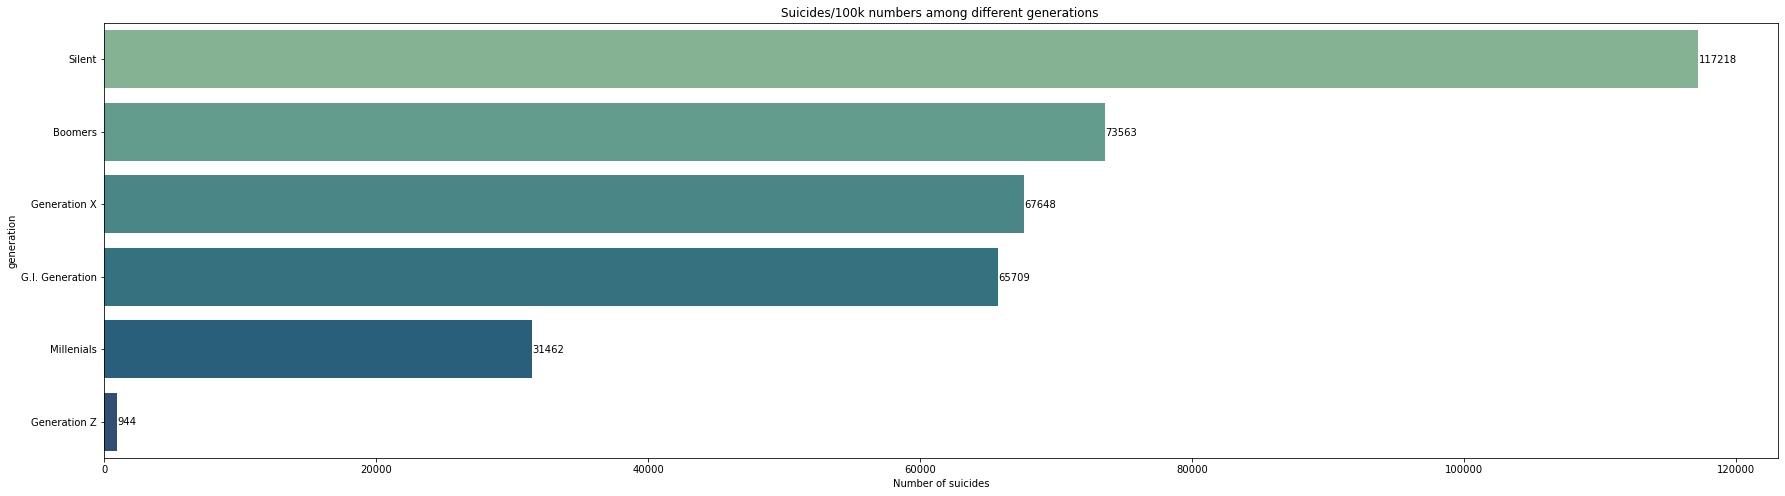

In [107]:
plt.figure(figsize=(30,8))

ax = sns.barplot(
    y= 'generation',
    x= 'suicides/100k pop',
    data = df.groupby('generation')['suicides/100k pop'].sum().reset_index().sort_values('suicides/100k pop',ascending=False),
    ci=None,
    estimator = sum,
    palette='crest');

ax.set(ylabel="generation", xlabel = "Number of suicides", title = "Suicides/100k numbers among different generations ");

for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_width()), xy=(bar.get_width()+0.01, bar.get_y()+0.45))

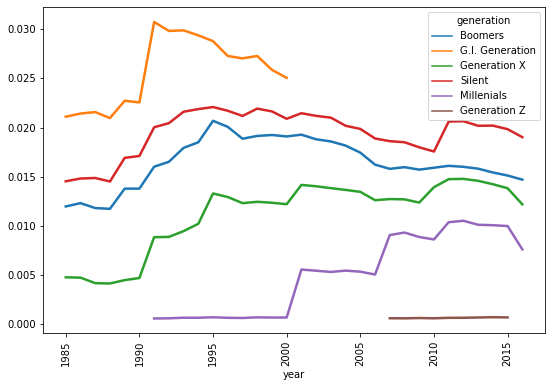

In [136]:
df_generation = df.groupby(['year','generation'])['suicides_no', 'population'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation['suicides_no']*100/df_generation['population'], hue = "generation",
             data = df_generation, linewidth = 2.5, style = "generation"
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()